In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_score

from scipy.stats import zscore
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/grive')

Mounted at /content/grive


In [ ]:
# Read in .csv data into a dataframe

df_vehicle = pd.read_csv('vehicle.csv')

Data Analysis

In [ ]:
df_vehicle.shape

(846, 19)

In [ ]:
# Checking for invalid unique values Feature-wise
for (columnName, columnData) in df_vehicle.iteritems():
    print (columnName, ":", df_vehicle[columnName].unique())
    print("\n\n")

compactness : [ 95  91 104  93  85 107  97  90  86  88  89  94  96  99 101  84  87  83
 102  80 100  82 106  81 119  78  92  98 103  77  73  79 110 108 109 111
 105 112 116 113 117 115  76 114]



circularity : [48. 41. 50. 44. nan 43. 34. 36. 46. 42. 49. 55. 54. 56. 47. 37. 39. 53.
 45. 38. 35. 40. 59. 52. 51. 58. 57. 33.]



distance_circularity : [ 83.  84. 106.  82.  70.  73.  66.  62.  98.  74.  85.  79. 103.  51.
  77. 100.  75.  53.  64. 105.  80.  54.  63. 107.  nan  72.  86.  68.
 104.  87.  76.  81.  71. 101.  96.  78. 108.  91.  89.  94.  92.  60.
  57.  65.  50.  88. 109.  95.  90.  58.  69.  47.  40.  59. 110.  93.
 102. 112.  61.  42.  49.  44.  52.  55.]



radius_ratio : [178. 141. 209. 159. 205. 172. 173. 157. 140.  nan 143. 136. 171. 144.
 203. 201. 109. 197. 186. 215. 153. 121. 148. 219. 154. 119. 193. 129.
 160. 151. 222. 177. 118. 306. 176. 169. 214. 105. 137. 183. 220. 145.
 133. 122. 147. 115. 174. 228. 175. 185. 195. 221. 212. 135. 120. 156.
 125. 164. 161. 227.

In [ ]:
# Percentage of Null values Feature-wise

(df_vehicle.isnull().sum()/len(df_vehicle))*100

compactness                    0.000000
circularity                    0.591017
distance_circularity           0.472813
radius_ratio                   0.709220
pr.axis_aspect_ratio           0.236407
max.length_aspect_ratio        0.000000
scatter_ratio                  0.118203
elongatedness                  0.118203
pr.axis_rectangularity         0.354610
max.length_rectangularity      0.000000
scaled_variance                0.354610
scaled_variance.1              0.236407
scaled_radius_of_gyration      0.236407
scaled_radius_of_gyration.1    0.472813
skewness_about                 0.709220
skewness_about.1               0.118203
skewness_about.2               0.118203
hollows_ratio                  0.000000
class                          0.000000
dtype: float64

In [ ]:
# Number of Null values feature-wise
df_vehicle.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [ ]:
df_vehicle.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [ ]:
df_vehicle.head(20)

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


In [ ]:
# Number of Unique Values with each dataset columns

df_vehicle.nunique()

compactness                     44
circularity                     27
distance_circularity            63
radius_ratio                   134
pr.axis_aspect_ratio            37
max.length_aspect_ratio         21
scatter_ratio                  131
elongatedness                   35
pr.axis_rectangularity          13
max.length_rectangularity       66
scaled_variance                128
scaled_variance.1              422
scaled_radius_of_gyration      143
scaled_radius_of_gyration.1     39
skewness_about                  23
skewness_about.1                41
skewness_about.2                30
hollows_ratio                   31
class                            3
dtype: int64

In [ ]:
# Finding the most common categories in each of the 19 categorical variables and replacing the existing Null values under them with respective most common values

for (columnName, columnData) in df_vehicle.iteritems():
    list = df_vehicle[columnName].value_counts()[df_vehicle[columnName].value_counts() == df_vehicle[columnName].value_counts().max()].index.tolist()
    df_vehicle[columnName] = df_vehicle[columnName].fillna(list[0])

Text(0.5, 1.0, 'class')

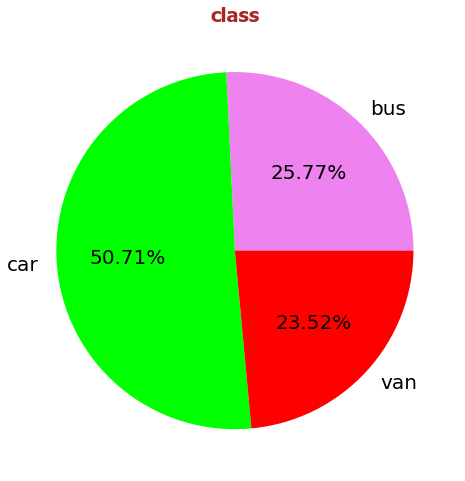

In [ ]:
# Pie-chart with percentage value for class - target variable

font1 = {'family': 'Tahoma',
        'color':  'brown',
        'weight': 'bold',
        'size': 20,
        }

plt.figure(figsize=(8,15))
df_vehicle.groupby('class').size().plot(kind='pie', autopct='%1.2f%%', textprops={'fontsize': 20},colors=['violet','lime','red'],label="")
plt.title('class', fontdict = font1)

In [ ]:
# Finding if there are any duplicated rows in the datasets

bool = df_vehicle.duplicated()
bool.value_counts()

False    846
dtype: int64

In [ ]:
# Spliting dataset into X and Y  variables

# independant variables split into X
X = df_vehicle.drop(['class'], axis=1)

# the dependent variable split into Y
Y = df_vehicle[['class']]


In [ ]:
# convert all attribute values to fit into a Z scale 

XScaled  = X.apply(zscore)

In [ ]:
# Training a Base Model with SVM

model_svm = svm.SVC()
model_svm.fit(XScaled, Y)
Y_predict = model_svm.predict(XScaled)

In [ ]:
# Performance Metric Values For SVM Base Model applied to dataset
print("Classification Report For SVM Model applied to Dataset used to train: \n\n", classification_report(Y,Y_predict))

Classification Report For SVM Model applied to Dataset used to train: 

               precision    recall  f1-score   support

         bus       0.99      0.98      0.99       218
         car       0.99      0.98      0.99       429
         van       0.95      0.98      0.97       199

    accuracy                           0.98       846
   macro avg       0.98      0.98      0.98       846
weighted avg       0.98      0.98      0.98       846



Principal Component Analysis

In [ ]:
# Covariance matrix required for PCA Analysis

covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68495495  0.78929853  0.69025823  0.09238115  0.14842463
   0.81375135 -0.78972493  0.81441559  0.67694334  0.76208843  0.8141166
   0.5849491  -0.250143    0.24078791  0.15720044  0.29889034  0.36598446]
 [ 0.68495495  1.00118343  0.79010334  0.62425844  0.15595884  0.25204101
   0.84801041 -0.82167998  0.84175408  0.961564    0.79630032  0.83483948
   0.92498778  0.05051392  0.14492613 -0.01095237 -0.10344254  0.04764626]
 [ 0.78929853  0.79010334  1.00118343  0.77071695  0.15989027  0.26533469
   0.9042983  -0.91016544  0.89122695  0.77284572  0.85986377  0.88439242
   0.70253333 -0.22929301  0.11683542  0.26714905  0.14876666  0.33663557]
 [ 0.69025823  0.62425844  0.77071695  1.00118343  0.661491    0.44914439
   0.73794828 -0.79266113  0.71214272  0.57216144  0.79582031  0.7212676
   0.53881725 -0.18034161  0.05557921  0.17154228  0.38232061  0.46987112]
 [ 0.09238115  0.15595884  0.15989027  0.661491    1.00118343  0.64931939
   0.10471334 -0.18411656  0.0811868

In [ ]:
# Applying PCA for creating 10 PCs from the X Scaled dataset of 19 columns-  reduce the number of columns further to capture only 95% of the variations that impacts the target

pca = PCA(n_components=10)
pca.fit(XScaled)

PCA(n_components=10)

In [ ]:
# The Eigen Values

print(pca.explained_variance_)

[9.40011283 3.0156039  1.90021233 1.17579012 0.92041367 0.54182242
 0.35872543 0.22315681 0.16001786 0.09220464]


In [ ]:
# The Eigen Vectors

print(pca.components_)

[[ 2.75302196e-01  2.93038568e-01  3.04163005e-01  2.68423208e-01
   8.08388363e-02  9.73232313e-02  3.17211650e-01 -3.14210328e-01
   3.13825224e-01  2.82846426e-01  3.09178738e-01  3.13640211e-01
   2.71772121e-01 -2.10154919e-02  4.26881076e-02  5.81822632e-02
   3.04822773e-02  7.43266717e-02]
 [-1.26841984e-01  1.24907525e-01 -7.50322872e-02 -1.87552192e-01
  -1.20600174e-01  1.17394626e-02  4.82889777e-02  1.25045132e-02
   5.96888889e-02  1.16333948e-01  6.31095259e-02  5.40659431e-02
   2.10309202e-01  4.89038904e-01 -5.70099470e-02 -1.23983773e-01
  -5.40841642e-01 -5.40194461e-01]
 [-1.19909212e-01 -2.39645977e-02 -5.54484755e-02  2.73411918e-01
   6.42721880e-01  5.92467195e-01 -9.80937529e-02  5.79038960e-02
  -1.09908749e-01 -1.67191296e-02  5.57866775e-02 -1.09467802e-01
  -3.15626183e-02  2.84736918e-01 -1.13029401e-01 -7.75092729e-02
   1.10935845e-02  4.12589798e-02]
 [ 7.97977600e-02  1.87324974e-01 -7.30850235e-02 -4.15868728e-02
   2.95425761e-02  2.69300180e-02 -9.

In [ ]:
# Percentage of variation explained by each Eigen Vector

print(pca.explained_variance_ratio_)

[0.5216112  0.16733552 0.10544257 0.06524446 0.05107365 0.03006566
 0.01990563 0.01238295 0.00887937 0.00511642]


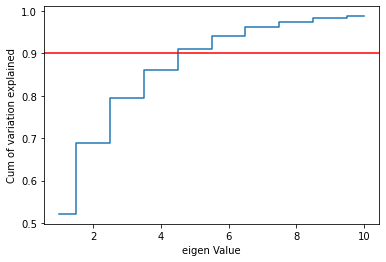

In [ ]:
# Plot for cumulative sum of %age of variation explained by each eigen vector

plt.step(range(1,11),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.axhline(y = 0.9, color = 'r', linestyle = '-')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.show()



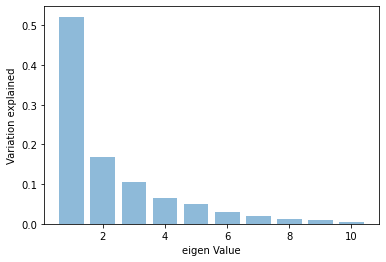

In [ ]:
plt.bar(range(1,11),pca.explained_variance_ratio_,alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

In [ ]:
# Applying 6 principal components to fit the Scaled X data

pca6 = PCA(n_components=6)
pca6.fit(XScaled)
print(pca6.components_, "\n\n")
print(pca6.explained_variance_ratio_)
Xpca6 = pca6.transform(XScaled)

[[ 2.75302196e-01  2.93038568e-01  3.04163005e-01  2.68423208e-01
   8.08388363e-02  9.73232313e-02  3.17211650e-01 -3.14210328e-01
   3.13825224e-01  2.82846426e-01  3.09178738e-01  3.13640211e-01
   2.71772121e-01 -2.10154919e-02  4.26881076e-02  5.81822632e-02
   3.04822773e-02  7.43266717e-02]
 [-1.26841984e-01  1.24907525e-01 -7.50322872e-02 -1.87552192e-01
  -1.20600174e-01  1.17394626e-02  4.82889777e-02  1.25045132e-02
   5.96888889e-02  1.16333948e-01  6.31095259e-02  5.40659431e-02
   2.10309202e-01  4.89038904e-01 -5.70099470e-02 -1.23983773e-01
  -5.40841642e-01 -5.40194461e-01]
 [-1.19909212e-01 -2.39645977e-02 -5.54484755e-02  2.73411918e-01
   6.42721880e-01  5.92467195e-01 -9.80937529e-02  5.79038960e-02
  -1.09908749e-01 -1.67191296e-02  5.57866775e-02 -1.09467802e-01
  -3.15626183e-02  2.84736918e-01 -1.13029401e-01 -7.75092729e-02
   1.10935845e-02  4.12589798e-02]
 [ 7.97977600e-02  1.87324974e-01 -7.30850234e-02 -4.15868729e-02
   2.95425762e-02  2.69300180e-02 -9.

In [ ]:
# Training a Base Model with SVM using the X data having the 6 principal components we arrived at

model_svm_pca = svm.SVC()
model_svm_pca.fit(Xpca6, Y)
Y_predict_pca = model_svm_pca.predict(Xpca6)

In [ ]:
# Performance Metric Values For SVM Model applied to X data having the 6 principal components we arrived at

print("Classification Report For SVM Model used to train X Dataset with 6 principal components : \n\n", classification_report(Y,Y_predict_pca))

Classification Report For SVM Model used to train X Dataset with 6 principal components : 

               precision    recall  f1-score   support

         bus       0.93      0.87      0.90       218
         car       0.92      0.92      0.92       429
         van       0.86      0.91      0.89       199

    accuracy                           0.91       846
   macro avg       0.90      0.90      0.90       846
weighted avg       0.91      0.91      0.91       846



Hyperparameter Tuning of SVC Model Using Grid SearchCV

In [ ]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(Xpca6, Y)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.547 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.556 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.550 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.544 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.824 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.828 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.787 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.811 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.518 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our PCA based SVM model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)


In [ ]:
# Predicting with the Hyperparameter tuning 

Y_predict_pca_grid = grid.predict(Xpca6)

In [ ]:
# Performance Metric Values For Hyperparameter Tuned SVM Model applied to Scaled X dataset
print("Classification Report For Hyperparameter tuned SVM Model used to train X Dataset : \n\n", classification_report(Y,Y_predict_pca_grid))

Classification Report For Hyperparameter tuned SVM Model used to train X Dataset : 

               precision    recall  f1-score   support

         bus       0.95      0.94      0.95       218
         car       0.97      0.95      0.96       429
         van       0.91      0.96      0.94       199

    accuracy                           0.95       846
   macro avg       0.95      0.95      0.95       846
weighted avg       0.95      0.95      0.95       846

